# Kapittel 9

In [1]:
# Import
import sys
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = -1
b = 3
r = a+(b-a)*random.random()
print(f'r = {r:.4f}')

r = 0.0767


estimat = 1.0802


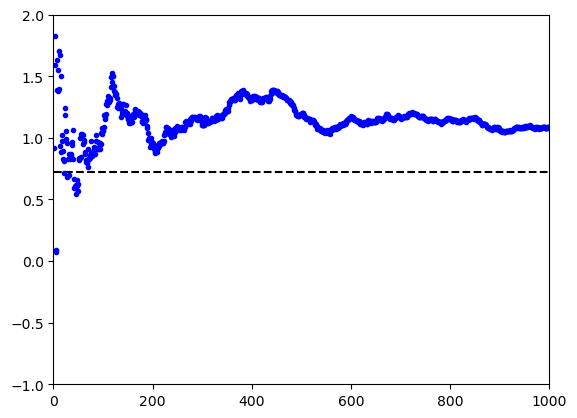

In [3]:
# MonteCarloPlott.m

"""Skript som estimerer eit integral ved Monte Carlo-metoden.

Sjølve integralet, og den analytiske løysninga 
av det, er spesifisert i starten av skriptet - i tillegg
til det maksimale talet på trekk.
"""

# Integrasjonsgrenser
a = -1
b = 3

def funk(x):
    """Integrand"""
    return x * np.sin(x**2)

# Kjent analytisk svar:
fasit = (np.cos(1)-np.cos(9))/2

# Maksimalt tal på trekk:
n_max = 1000

# Initierer summen
MC_sum = 0

# Lagar klart plott for estimata - saman med eksakt svar
plt.plot(range(1, n_max+1), fasit*np.ones(n_max), 'k--')

# Vi utfører uttrekka og legg til summen for kvar gong
for n in range(1, n_max+1):
    x = a+(b-a)*random.random()
    MC_sum = MC_sum+funk(x)
    estimat = (b-a)*MC_sum/n         # Integral-estimat
    plt.plot(n, estimat, 'b.')       # Plottar estimat

plt.xlim(0, n_max)
plt.ylim(-1, 2)

# Skriv svaret til skjerm
print(f'estimat = {estimat:.4f}')

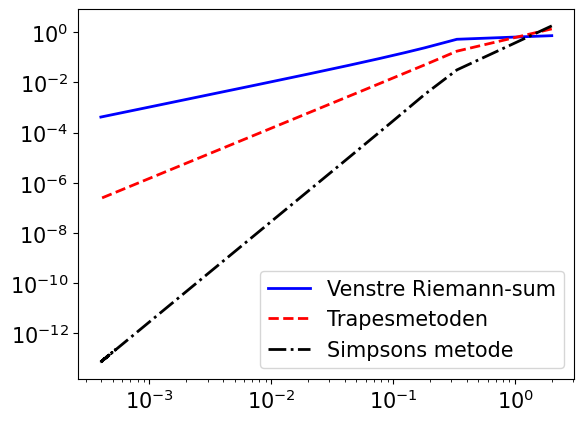

In [6]:
# RiemannFunkV.m (fra Canvas)

def riemann_funk_V(funk, a, b, N):
    """Funksjonsfil som estimerar eit integral
    
    som ein Riemann-sum på ein regulær partisjon med venstre-
    seleksjon.
    Integranden og grenser er hard-koda, input er
    N, talet på del-intervall.
    """
    
    # Oppdeling
    delta_x = (b-a)/N
    
    # Initerar summen:
    R = 0
    
    # Reknar ut summen
    for n in range(1, N+1):
        x = a+(n-1)*delta_x             # Oppdaterar x
        R = R+delta_x*funk(x)           # Oppdaterar summen

    return R

# TrapesFunk.m

def trapes_funk(funk, a, b, N):
    """Implementering av trapesmetoden for numerisk integrasjon.
    
    Integranden funk, grensene a og b, og oppdelinga N
    blir gitt som input.
    """
    
    # Steglengda
    h = (b-a)/N
    
    # Bidrag frå endane
    T = h/2*(funk(a)+funk(b))
    
    # Resten av bidraga
    for i in range(1, n):
        xi = a+i*h
        T = T+h*funk(xi)

    return T

# SimpsonsFunk.m (fra Canvas)

def simpsons_funk(funk, a, b, N):
    """Funksjonsfil som estimerar eit integral 
    ved hjelp av Simpsons metode.
    Integranden og grenser er hard-koda, input er
    N, talet på del-intervall.
    """
    
    # Oppdeling
    delta_x = (b-a)/N
    
    # Initerar summen og tar med endane:
    S = (funk(a)+funk(b))
    
    # Oddetalsbidrag
    for n in range(1, N, 2):
        x = a+n*delta_x            # Oppdaterar x
        S = S+4*funk(x)           # Oppdaterar summen
    
    # Partalssbidrag
    for n in range(2, N-1, 2):
        x = a+n*delta_x            # Oppdaterar x
        S = S+2*funk(x)           # Oppdaterar summen
    
    # Korrigerar svar med delta_x/3
    S = S*delta_x/3
    
    return S

# PlottFeilenInt.m

"""Skript som plottar feilen i eit estimat

for ein Riemann-sum, trapesmetoden og Simpsons metode.
"""

def funk(x):
    """Integrand"""
    return x*np.sin(x**2)

# Spesifiserer grenser og eksakt svar
a = -1
b = 3
fasit = (np.cos(1)-np.cos(9))/2

# Lagar vektor med n-verdiar
n_start = 2
n_steg = 10
n_slutt = 10000
n_vektor = np.arange(n_start, n_slutt+1, n_steg)
h_vektor = (b-a)/n_vektor

# Utan dtype=float vil vi har få vektorar av heiltal,
# sidan n_vektor består av heiltal
V_vektor = np.zeros_like(n_vektor, dtype=float)
T_vektor = np.zeros_like(n_vektor, dtype=float)
S_vektor = np.zeros_like(n_vektor, dtype=float)

# Lagar vektorar med estimat
indeks = 0
for n in n_vektor:
    V_vektor[indeks] = riemann_funk_V(funk, a, b, n)
    T_vektor[indeks] = trapes_funk(funk, a, b, n)
    S_vektor[indeks] = simpsons_funk(funk, a, b, n)
    indeks = indeks+1

# Plottar feilen
plt.rcParams.update({'font.size': 15})
plt.loglog(h_vektor, abs(V_vektor-fasit), 'b-', linewidth=2, label="Venstre Riemann-sum")
plt.loglog(h_vektor, abs(T_vektor-fasit), 'r--', linewidth=2, label="Trapesmetoden")
plt.loglog(h_vektor, abs(S_vektor-fasit), 'k-.', linewidth=2, label="Simpsons metode")

plt.legend(loc="lower right")
plt.show()

In [33]:
# RektangelSum.m

# Skript som reknar ut ein sum av areal av rektangel

# Talet på rektangel
n = int(input('Kor mange rektangel? '))

def funk(x):
    """Funksjonen"""
    return x**3

# Grenser
a = 1
b = 3

# Bestemmer h og initierer summen V
h = (b-a)/n
V = 0

for i in range(0, n):
    xi = a+i*h
    V = V+h*funk(xi)

# Skriv summen V til skjerm
print(f'V = {V:.4f}')

Kor mange rektangel?  10000


V = 19.9974


In [36]:
# RektangelSumV2.m

# Skript som estimerer eit integral på tre måtar:
# Venstre og høgre Riemann-sum og trapesmetoden

# Talet på rektangel
n = int(input('Kor mange rektangel? '))

def funk(x):
    """Funksjonen"""
    return x**3

# Grenser
a = 1
b = 3

# Bestemmer h og initierer summane V og H
h = (b-a)/n
V = 0
H = 0

# Reknar ut venstresummen
for i in range(0, n):
    xi = a+i*h
    V = V+h*funk(xi)

# Reknar ut høgresummen
for i in range(1, n+1):
    xi = a+i*h
    H = H+h*funk(xi)

# Skriv summane V, H og T til skjerm
print(f'V = {V:.4f}')
print(f'H = {H:.4f}')
T=(V+H)/2            # Trapessummen
print(f'T = {T:.4f}')

Kor mange rektangel?  100


V = 19.7408
H = 20.2608
T = 20.0008


In [6]:
# RiemannFunk.m

def riemann_funk(x, y):
    """Funksjon som beregner venstre Rimann sum for gitte x- og y-vektorer
    
    Partisjonen, gitt ved x-vektoren, må være regulær.
    """
    
    # Bestemmer steglengda og antall steg
    h = x[1]-x[0]
    n = len(x)
    
    # Initierer summen
    V = 0
    
    for i in range(0, n):
        V = V+h*y[i]
    
    return V

print(f'riemann_funk(np.arange(0, 10), np.arange(0, 10)) = {riemann_funk(np.arange(0, 10), 
                                                                         np.arange(0, 10)):.2f}')

riemann_funk(np.arange(0, 10), np.arange(0, 10)) = 45.00


In [7]:
# RiemannFunkMidt.m

def riemann_funk(x, y):
    """Funksjon som beregner venstre Rimann sum for gitte x- og y-vektorer
    
    Partisjonen, gitt ved x-vektoren, må være regulær.
    """
    
    # Bestemmer steglengda og antall steg
    h = x[1]-x[0]
    n = len(x)
    
    # Initierer summen
    V = 0
    
    for i in range(0, n):
        V = V+h*y[i]

    return V

print(f'riemann_funk(np.arange(0, 10), np.arange(0, 10)) = {riemann_funk(np.arange(0, 10), 
                                                                         np.arange(0, 10)):.2f}')

riemann_funk(np.arange(0, 10), np.arange(0, 10)) = 45.00


In [17]:
integral = 2/7

In [42]:
# Simpson.m

# Implementering av Simpsons metode.
# Integrasjonsgrensene a og b, oppdelinga n og integranden
# funk blir gitt heilt i toppen av skriptet.
# For å gi oppdelinga n brukar vi input-funksjonen

# Integrasjonsgrensene
a = 1
#a = -1
#a = 0
b = 3
#b = 1

def funk(x):
    """Integranden"""
    return x**3
    #return np.sin(x**2)
    #return x**6
    #return np.cos(np.pi*x)

# Oppdeling (kontrollerer at n er eit partal)
n = int(input('Gi oppdelinga n: '))

if round(n/2) != n/2:
    sys.exit('n må vere eit partal')

h = (b-a)/n                  # Steglengda

# Bidrag frå endane
S = h/3*(funk(a)+funk(b))

# Oddetalsbidrag:
for i in range(1, n, 2):
    xi = a+i*h
    S = S+h/3*4*funk(xi)

# Partalsbidrag
for i in range(2, (n-1), 2):
    xi = a+i*h
    S = S+h/3*2*funk(xi)

# Skriv svaret til skjerm
print(f'S = {S:.15f}')
#print(f'S = {S:.4f}')

Gi oppdelinga n:  2


S = 20.000000000000000


In [34]:
feil = abs(S-integral)
print(f'feil = {feil:.4e}')

feil = 8.3185e-06


In [43]:
print(f'S-20 = {(S-20):.4e}')

S-20 = 0.0000e+00


In [9]:
# SimpsonFunk.m

def simpson_funk(x, y):
    """Funksjon som beregner integral ved Simpsons metode 
    
    for gitte x- og y-vektorer
    Partisjonen, gitt ved x-vektoren, må være regulær.
    """
    
    # Bestemmer steglengda og antall steg
    h = x[1]-x[0]
    n = len(x)
    
    # Ende-bidrag:
    S = h/3*(y[0]+y[n-1])
    
    # Partalls-bidrag
    for i in range(2, n-1, 2):
        S = S+h/3*4*y[i]
    
    # Oddetalls-bidrag
    for i in range(1, n-1, 2):
        S = S+h/3*2*y[i]
    
    return S

print(f'simpson_funk(np.arange(0, 10), np.arange(0, 10)) = {simpson_funk(np.arange(0, 10), 
                                                                         np.arange(0, 10)):.2f}')

simpson_funk(np.arange(0, 10), np.arange(0, 10)) = 40.33


In [12]:
integral = 2+np.log(3)
#integral = (np.cos(1)-np.cos(9))/2
#integral = 2/7

In [38]:
# Trapes.m

# Implementering av trapesmetoden for numerisk integrasjon
#
# Integrasjonsgrensene a og b, oppdelinga n og integranden
# funk blir gitt heilt i toppen av skriptet.
# For å gi n brukar vi input-funksjonen.

# Integrasjonsgrenser
#a = 2
a = -1
#b = 4
#b = 3
b = 1

def funk(x):
    """Integranden"""
    return np.sin(x**2)
    #return x/(x-1)
    #return x*np.sin(x**2)
    #return x**6

# Oppdeling
n = int(input('Gi oppdelinga n: '))

h = (b-a)/n                  # Steglengda

# Bidrag frå endane
T = h/2*(funk(a)+funk(b))

# Resten av bidraga
for i in range(1, n):
    xi = a+i*h
    T = T+h*funk(xi)

# Skriv svaret til skjerm
print(f'T = {T:.15f}')
#print(f'T = {T:.4f}')

Gi oppdelinga n:  400


T = 0.620541105991013


In [15]:
feil = abs(T-integral)
print(f'feil = {feil:.4e}')

feil = 9.6748e-06


In [61]:
A = .5*np.array([[-2, 2, 0, 0, 0], 
                 [-1, 0, 1, 0, 0], 
                 [0, -1, 0, 1, 0], 
                 [0, 0, -1, 0, 1], 
                 [0, 0, 0, -2, 2]])

print(A)

B = np.array([[0, 0, 0, 0, 0], 
              [.5, .5, 0, 0, 0], 
              [.5, 1, .5, 0, 0], 
              [.5, 1, 1, .5, 0], 
              [.5, 1, 1, 1, .5]])

print(B)

[[-1.   1.   0.   0.   0. ]
 [-0.5  0.   0.5  0.   0. ]
 [ 0.  -0.5  0.   0.5  0. ]
 [ 0.   0.  -0.5  0.   0.5]
 [ 0.   0.   0.  -1.   1. ]]
[[0.  0.  0.  0.  0. ]
 [0.5 0.5 0.  0.  0. ]
 [0.5 1.  0.5 0.  0. ]
 [0.5 1.  1.  0.5 0. ]
 [0.5 1.  1.  1.  0.5]]


In [62]:
A.dot(B)

array([[0.5 , 0.5 , 0.  , 0.  , 0.  ],
       [0.25, 0.5 , 0.25, 0.  , 0.  ],
       [0.  , 0.25, 0.5 , 0.25, 0.  ],
       [0.  , 0.  , 0.25, 0.5 , 0.25],
       [0.  , 0.  , 0.  , 0.5 , 0.5 ]])

In [63]:
A = .5*np.array([[-3, 4, -1, 0, 0],
                 [-1, 0, 1, 0, 0],
                 [0, -1, 0, 1, 0],
                 [0, 0, -1, 0, 1],
                 [0, 0, 1, -4, 3]])

In [64]:
A.dot(B)

array([[ 0.75,  0.5 , -0.25,  0.  ,  0.  ],
       [ 0.25,  0.5 ,  0.25,  0.  ,  0.  ],
       [ 0.  ,  0.25,  0.5 ,  0.25,  0.  ],
       [ 0.  ,  0.  ,  0.25,  0.5 ,  0.25],
       [ 0.  ,  0.  , -0.25,  0.5 ,  0.75]])